In [45]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

pd.options.display.max_columns=200

In [62]:
import matplotlib.pyplot as plt

In [ ]:
breast_cancer_data = load_breast_cancer()

In [8]:
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Read data 

In [10]:
df = pd.DataFrame(data=breast_cancer_data['data'],
            columns=breast_cancer_data.feature_names)

In [25]:
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [32]:
df_target = pd.DataFrame(breast_cancer_data['target'],).rename(columns={0:'target'})

In [33]:
df_target.head(2)

,target
0,0
1,0


In [37]:
training_data, validation_data, training_labels, validation_labels = train_test_split(df, df_target, test_size=0.20, random_state=100)

In [40]:
len(training_data), len(training_labels)

(455, 455)

In [41]:
len(validation_data), len(validation_labels)

(114, 114)

In [44]:
training_data.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
58,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,0.4040,1.214,2.595,32.96,0.007491,0.008593,0.000692,0.004167,0.02190,0.002990,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289
554,12.88,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.023430,0.1566,0.05708,0.2116,1.360,1.502,16.83,0.008412,0.021530,0.038980,0.007620,0.01695,0.002801,13.89,35.74,88.84,595.7,0.1227,0.16200,0.243900,0.06493,0.2372,0.07242


In [50]:
import numpy as np

In [61]:
scores

{1: 0.9298245614035088,
 2: 0.9385964912280702,
 3: 0.9473684210526315,
 4: 0.9473684210526315,
 5: 0.9473684210526315,
 6: 0.9473684210526315,
 7: 0.9473684210526315,
 8: 0.9473684210526315,
 9: 0.956140350877193,
 10: 0.956140350877193,
 11: 0.956140350877193,
 12: 0.956140350877193,
 13: 0.956140350877193,
 14: 0.956140350877193,
 15: 0.956140350877193,
 16: 0.956140350877193,
 17: 0.956140350877193,
 18: 0.956140350877193,
 19: 0.956140350877193,
 20: 0.956140350877193,
 21: 0.956140350877193,
 22: 0.956140350877193,
 23: 0.9649122807017544,
 24: 0.9649122807017544,
 25: 0.956140350877193,
 26: 0.956140350877193,
 27: 0.956140350877193,
 28: 0.956140350877193,
 29: 0.9473684210526315,
 30: 0.9473684210526315,
 31: 0.9473684210526315,
 32: 0.9473684210526315,
 33: 0.9473684210526315,
 34: 0.9473684210526315,
 35: 0.9473684210526315,
 36: 0.9473684210526315,
 37: 0.956140350877193,
 38: 0.956140350877193,
 39: 0.956140350877193,
 40: 0.956140350877193,
 41: 0.956140350877193,
 42: 0.

In [58]:
scores = {}
for k in range(1, 100):
    classifier = KNeighborsClassifier(n_neighbors=k)

    # I got a warning that told me to use RAVEL
    classifier.fit(training_data, np.ravel(training_labels))

    scores[k] = classifier.score(validation_data, validation_labels)

/Users/amlvt225/anaconda3/envs/data_science_env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/amlvt225/anaconda3/envs/data_science_env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eli

/Users/amlvt225/anaconda3/envs/data_science_env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/amlvt225/anaconda3/envs/data_science_env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eli

/Users/amlvt225/anaconda3/envs/data_science_env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/amlvt225/anaconda3/envs/data_science_env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eli

/Users/amlvt225/anaconda3/envs/data_science_env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/amlvt225/anaconda3/envs/data_science_env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eli

/Users/amlvt225/anaconda3/envs/data_science_env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/amlvt225/anaconda3/envs/data_science_env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eli

/Users/amlvt225/anaconda3/envs/data_science_env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/amlvt225/anaconda3/envs/data_science_env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eli

Text(0.5, 1.0, 'Breast Cancer Classifier Accuracy')

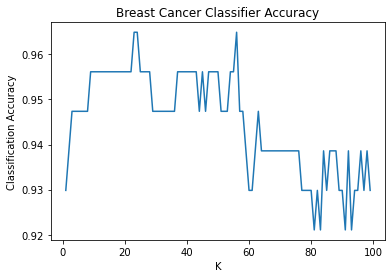

In [65]:
plt.plot(scores.keys(), scores.values())
plt.xlabel("K")
plt.ylabel("Classification Accuracy")
plt.title("Breast Cancer Classifier Accuracy")